In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from IPython import display
import time

In [2]:
logs=["L.log", "R.log", "U.log", "D.log", "S.log", "N.log", "bg.log"]
GESTURE_CNT = 7
tof_data=[[],[],[],[],[],[],[]]
distance_data=[[],[],[],[],[],[],[]]
peak_data=[[],[],[],[],[],[],[]]
noise_data=[[],[],[],[],[],[],[]]
ref_data=[[],[],[],[],[],[],[]]
intg_data=[[],[],[],[],[],[],[]]

for i in range(len(logs)):
    fr=open(logs[i])
    lines=fr.readlines()
    fr.close()
    for l in lines:
        l = l.strip().split(",")[:-1]
        if len(l) != 33:
            print("data err!")
            print(l)
            break
        tmp=[int(item.strip()) for item in l]
        tof_data[i].append(tmp)
        distance_data[i].append(tmp[:9])
        peak_data[i].append(tmp[9:18])
        noise_data[i].append(tmp[18:27])
        ref_data[i].append(tmp[27:30])
        intg_data[i].append(tmp[30:33])
    print(len(tof_data[i]))

FileNotFoundError: [Errno 2] No such file or directory: 'L.log'

In [ ]:
LRUD 1s 25 -> 20
SN 2s 50 -> 40
64 shift 32

In [3]:
for i in range(GESTURE_CNT):
    print(len(tof_data[i]), end=",")

698,661,726,755,984,924,578,

In [4]:
def mm2cm(d):
    d=(np.asarray(d)/10)
    d=np.where(d>255, 255, d).astype(np.uint8)
    return d

In [5]:
d_L=mm2cm(distance_data[0])
d_R=mm2cm(distance_data[1])
d_U=mm2cm(distance_data[2])
d_D=mm2cm(distance_data[3])
d_S=mm2cm(distance_data[4])
d_N=mm2cm(distance_data[5])
d_BG=mm2cm(distance_data[6])

In [6]:
d_L.shape

(698, 9)

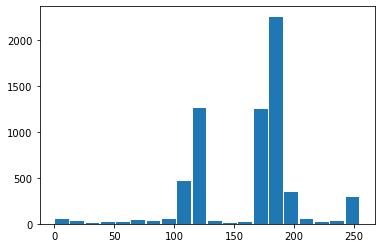

In [7]:
a=plt.hist(d_L.flatten(), bins=20, rwidth=0.9)

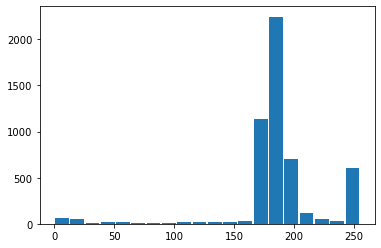

In [8]:
a=plt.hist(d_BG.flatten(), bins=20, rwidth=0.9)

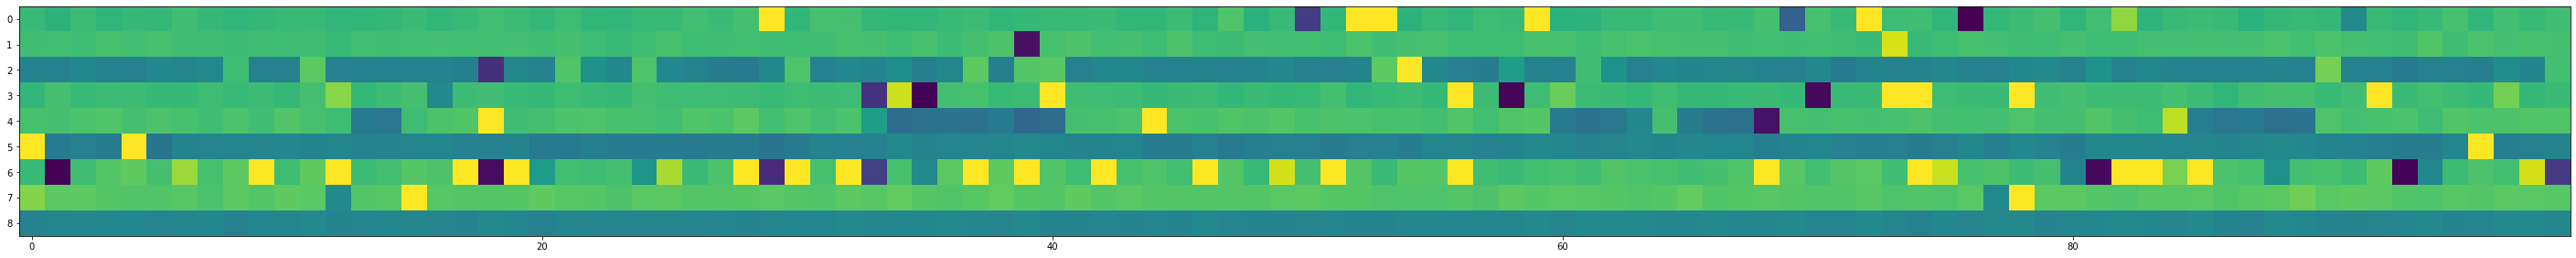

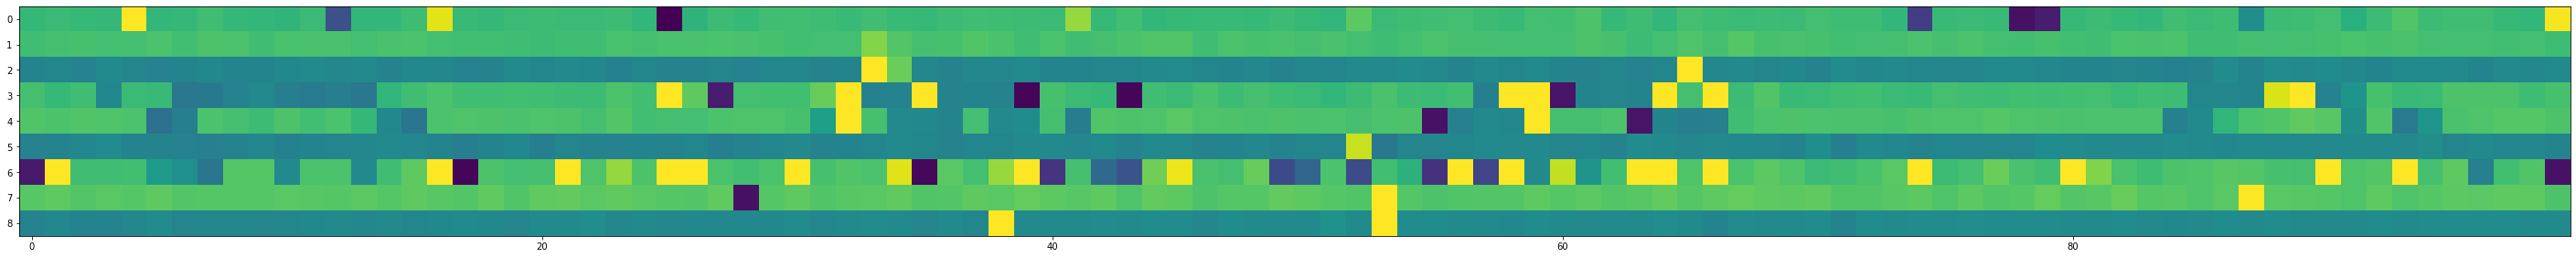

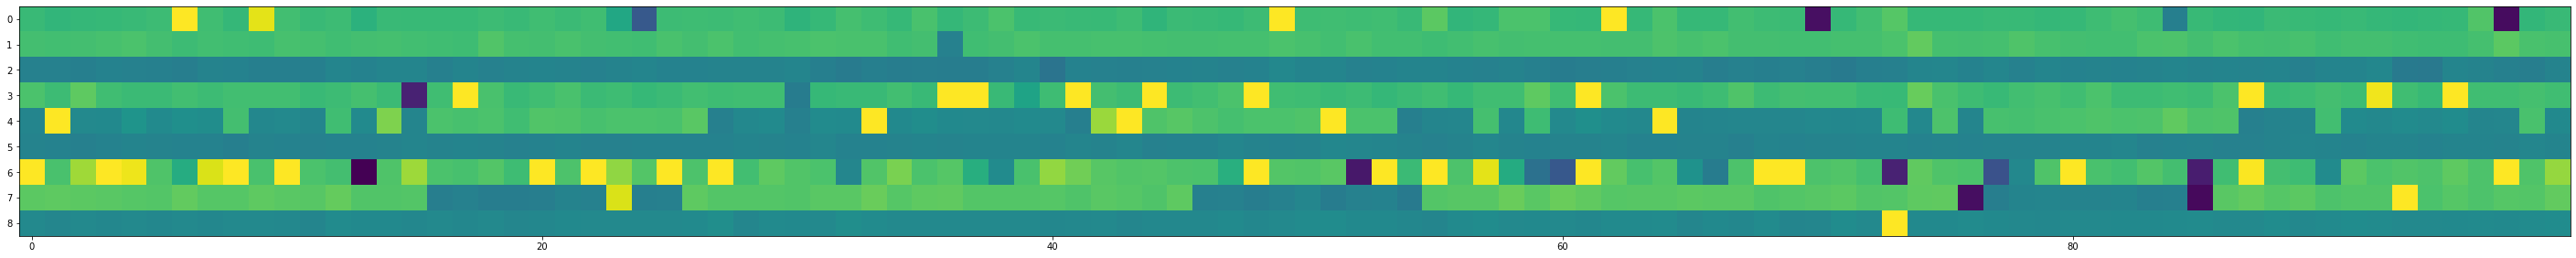

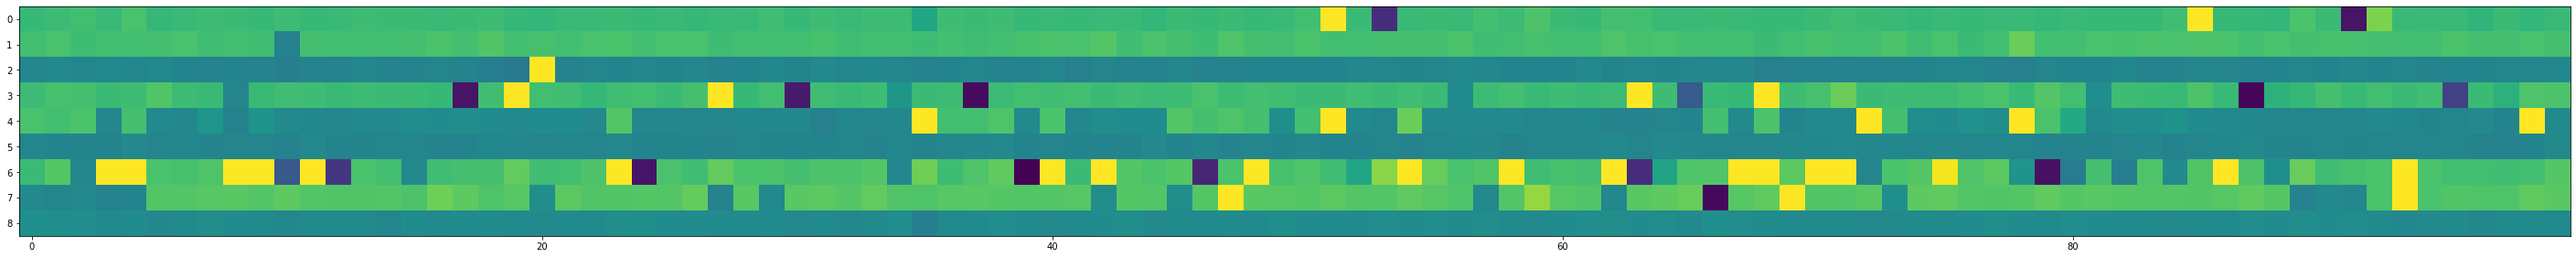

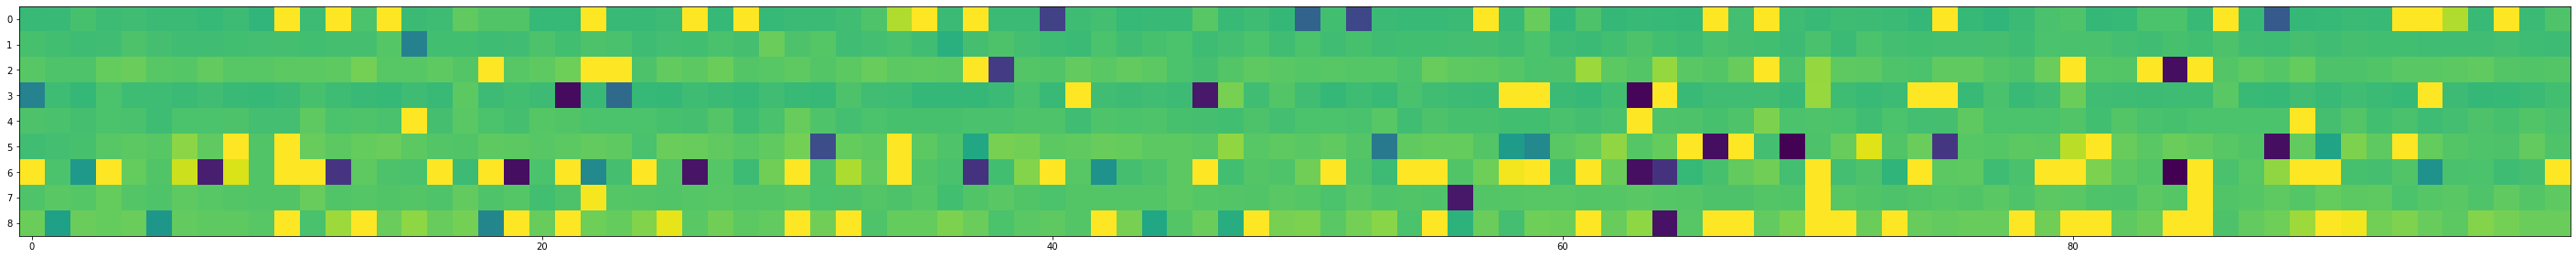

In [9]:
tof_fps = 25
start_t = 100
show_t  = tof_fps*4

plt.figure(figsize=(50, 5))
plt.imshow(d_L[start_t:start_t+show_t].T)
plt.figure(figsize=(50, 5))
plt.imshow(d_R[start_t:start_t+show_t].T)
plt.figure(figsize=(50, 5))
plt.imshow(d_U[start_t:start_t+show_t].T)
plt.figure(figsize=(50, 5))
plt.imshow(d_D[start_t:start_t+show_t].T)
plt.figure(figsize=(50, 5))
plt.imshow(d_BG[start_t:start_t+show_t].T)

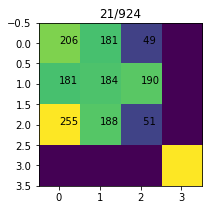

KeyboardInterrupt: 

<Figure size 216x216 with 0 Axes>

In [10]:
from IPython import display
import time
d = d_N
print(d.shape[0])
fw=open("1.txt","w")
t0=time.time()
for i in range(d.shape[0]//1):
    t1=time.time();fw.writelines("%.3f,"%(t1-t0));t0=time.time();
    plt.figure(figsize=(3, 3))
    t1=time.time();fw.writelines("%.3f,"%(t1-t0));t0=time.time();
    tmp = np.zeros((4,4)).astype(np.uint8)
    tmp[3,3] = 255
    tmp[:3,:3] = d[i].reshape((3,3))
    t1=time.time();fw.writelines("%.3f,"%(t1-t0));t0=time.time();
    plt.imshow(tmp)  #, cmap='turbo'
    plt.title("%d/%d"%(i,d.shape[0]))
    t1=time.time();fw.writelines("%.3f,"%(t1-t0));t0=time.time();
    for y in range(3):
        for x in range(3):
            plt.text(x,y,"%3d"%tmp[y,x])
    t1=time.time();fw.writelines("%.3f,"%(t1-t0));t0=time.time();
    #plt.pause(0.1)
    display.clear_output(wait=True) # wait=True表示如果要更新cell的内容需要等待下一个输入到cell里边
    t1=time.time();fw.writelines("%.3f,"%(t1-t0));t0=time.time();
    plt.show() # 这一步不能省
    t1=time.time();fw.writelines("%.3f,\r\n"%(t1-t0));t0=time.time();
fw.close()

In [2]:
import serial

ser = serial.Serial('COM6', 2000000)
print(ser)

Serial<id=0x25f7ff74310, open=True>(port='COM6', baudrate=2000000, bytesize=8, parity='N', stopbits=1, timeout=None, xonxoff=False, rtscts=False, dsrdtr=False)


In [9]:
i = 0
while True:
    ser.flushInput()  #show is slower than serial
    l = ser.readline()
    l = l.decode("utf-8")
    l = l.strip().split(",")[:-1]
    if len(l) != 33:
        print("data err! %d"%len(l))
        print(l)
        ser.flushInput()
        continue
    tmp=[int(item.strip()) for item in l]
    d = tmp[:9]
    d=(np.asarray(d)/10)
    d=np.where(d>255, 255, d).astype(np.uint8)
    plt.figure(figsize=(6, 6))
    tmp = np.zeros((4,4)).astype(np.uint8)
    tmp[3,3] = 255
    tmp[:3,:3] = d.reshape((3,3))
    plt.imshow(tmp)  #, cmap='turbo'
    plt.title("%d"%(i))
    for y in range(3):
        for x in range(3):
            plt.text(x,y,"%3d"%tmp[y,x])
    display.clear_output(wait=True)
    plt.show() 
    i += 1

KeyboardInterrupt: 

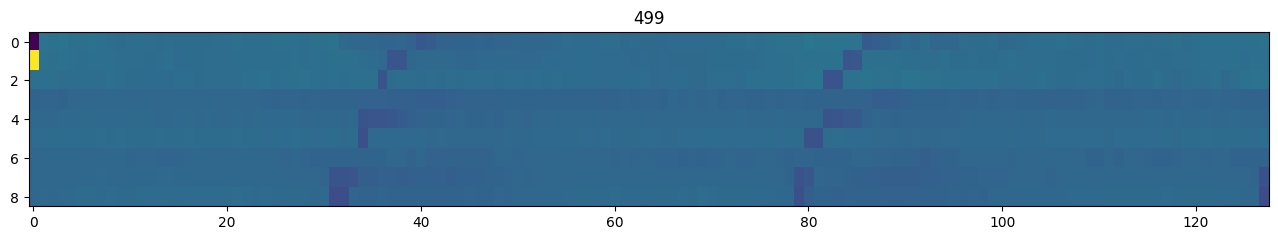

In [22]:
i = 0
CNT  = 9
TLEN = 128  #64*70=4.5s 
TSHIFT=8
x = np.linspace(0, CNT-1, CNT)
data = np.zeros((TLEN,CNT))

d_record = []
fw=open("1.txt","w")
t0=time.time()
while i<500:
    t1=time.time();fw.writelines("%.3f,"%(t1-t0));t0=time.time();
    j = 0
    data[:TLEN-TSHIFT] = data[TSHIFT:]
    data[TLEN-TSHIFT:] = 0
    while j < TSHIFT:
        l = ser.readline()
        l = l.decode("utf-8")
        l = l.strip().split(",")[:-1]
        if len(l) < 9 or len(l[0])<1:
            ser.flushInput()
            continue
        tmp=[int(item.strip()) for item in l]
        d = tmp[:9]
        d=(np.asarray(d)/10)
        #print(d.astype(np.int16))
        #continue
        d=np.where(d>255, 255, d).astype(np.uint8)
        data[TLEN-TSHIFT+j] = d
        d_record.append(d)
        j+=1
    data[0,0]=0;data[0,1]=255;
    plt.figure(figsize=(16, 4))
    plt.imshow(data.T, aspect=2)  #, cmap='turbo'
    plt.title("%d"%(i))
    display.clear_output(wait=True)
    plt.show() 
    i += 1
fw.close()
d_record=np.array(d_record)
np.save("./npy/12-2.npy", d_record)

In [8]:
d_record.shape

(800, 9)

In [26]:
from matplotlib.pyplot import MultipleLocator
d_record=np.load("./npy/3.npy")
assert(d_record.shape[0]//2 < 65536)
plt.figure(figsize=(d_record.shape[1]//2, d_record.shape[0]//2))
plt.imshow(d_record, aspect=1/5) 

y_major_locator=MultipleLocator(5)
ax=plt.gca()
ax.yaxis.set_major_locator(y_major_locator)

ValueError: Image size of 400x200000 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 400x200000 with 1 Axes>

In [6]:
d_record[-2]

array([112, 107, 133, 137, 173, 143,  71,   7, 142], dtype=uint8)

In [63]:
from pylab import xlim,ylim
i = 0
CNT=256
x = np.linspace(0, CNT-1, CNT)
data = np.zeros((64,CNT))

while True:
    ser.flushInput()  #show is slower than serial
    l = ser.readline()
    l = l.decode("utf-8")
    l = l.strip().split(",")[:-1]
    if len(l) != 256:
        #print("data err! %d"%len(l))
        #print(l)
        ser.flushInput()
        continue
    n = [int(item.strip(),16) for item in l]
    n = np.array(n[:CNT])/256
    n = np.where(n>255, 255, n).astype(np.uint8)
    plt.plot(x, n, color="r")
    plt.title("%d"%(i))
    ylim(0,255)
    display.clear_output(wait=True)
    plt.show()
    i += 1

KeyboardInterrupt: 

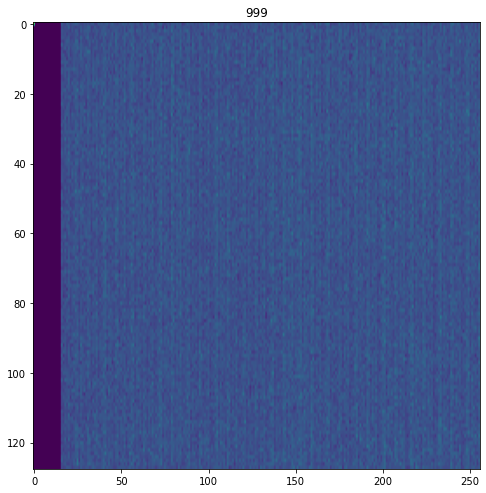

In [29]:
from pylab import xlim,ylim
i = 0
CNT  = 256
TLEN = 128  #64*70=4.5s 
TSHIFT=4
x = np.linspace(0, CNT-1, CNT)
data = np.zeros((TLEN,CNT))

fw=open("1.txt","w")
t0=time.time()
while i<1000:
    t1=time.time();fw.writelines("%.3f,"%(t1-t0));t0=time.time();
    j = 0
    data[:TLEN-TSHIFT] = data[TSHIFT:]
    data[TLEN-TSHIFT:] = 0
    while j < TSHIFT:
        l = ser.readline()
        l = l.decode("utf-8")
        l = l.strip().split(",")[:-1]
        if len(l) != 256:
            ser.flushInput()
            continue
        n = [int(item.strip(),16) for item in l]
        n = np.array(n[:CNT])/256
        
        #n -= np.mean(n)
        #n *= 2
        #n += 128
        
        n = np.where(n<0, 0, n)
        n = np.where(n>255, 255, n).astype(np.uint8)
        data[TLEN-TSHIFT+j] = n
        j+=1
    t1=time.time();fw.writelines("%.3f,"%(t1-t0));t0=time.time();
    data[0,0]=255
    plt.figure(figsize=(8, 16))
    plt.imshow(data, aspect=2)  #, cmap='turbo'
    plt.title("%d"%(i))
    t1=time.time();fw.writelines("%.3f,"%(t1-t0));t0=time.time();
    display.clear_output(wait=True)
    plt.show() 
    t1=time.time();fw.writelines("%.3f,"%(t1-t0));t0=time.time();
    i += 1
fw.close()

In [63]:
len(a)

568

In [64]:
int("f", 16)

15

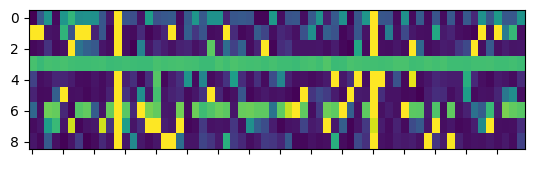

KeyboardInterrupt: 

In [35]:
import tensorflow as tf
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)
model = tf.keras.models.load_model("./h5/tof-7x3-310.h5")

i = 0
CNT  = 9
TLEN = 128  #64*70=4.5s 
TSHIFT=8
x = np.linspace(0, CNT-1, CNT)
data = np.zeros((TLEN,CNT))

d_record = []
fw=open("1.txt","w")
t0=time.time()
while i<500:
    t1=time.time();fw.writelines("%.3f,"%(t1-t0));t0=time.time();
    j = 0
    data[:TLEN-TSHIFT] = data[TSHIFT:]
    data[TLEN-TSHIFT:] = 0
    while j < TSHIFT:
        l = ser.readline()
        l = l.decode("utf-8")
        l = l.strip().split(",")[:-1]
        if len(l) < 9 or len(l[0])<1:
            ser.flushInput()
            continue
        tmp=[int(item.strip()) for item in l]
        d = tmp[:9]
        d=(np.asarray(d)/10)
        #print(d.astype(np.int16))
        #continue
        d=np.where(d>255, 255, d).astype(np.uint8)
        data[TLEN-TSHIFT+j] = d
        d_record.append(d)
        j+=1
        
        
        testin = np.array(d_record)
        if testin.shape[0]==64:
            d_record = []
            testinf = testin.reshape((1,64,9,1))/255
            out = model(testinf,training=False)
            pre = np.array(out).reshape((16,4))
#             print(pre)
            out = np.argmax(out,axis=-1).reshape(16)
            
            out = list(out)
            for i in range(len(out)):
                if out[i]==1:
                    pro = pre[i][1]
                    if pro>0.99:
                        out[i] = '右%s'%pro
                elif out[i]==2:
                    pro = pre[i][2]
                    if pro>0.99:
                        out[i] = '左%s'%pro
                elif out[i]==3:
                    pro = pre[i][3]
                    if pro>0.8:
                        out[i] = '摆%s'%pro
                else:
                    out[i] = ' '
            
            fig = plt.figure()

            testin[0,0]=0;testin[0,1]=255;
            plt.imshow(testin.T,aspect=2)
            plt.xticks(ticks=[0,4,8,12,16,20,24,28,32,36,40,44,48,52,56,60],labels=out,fontproperties=font,size=24,color='red')
            display.clear_output(wait=True)
            plt.show()
                  
